In [123]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import json
import random
from constants import *

(-0.5, 4079.5, 3071.5, -0.5)

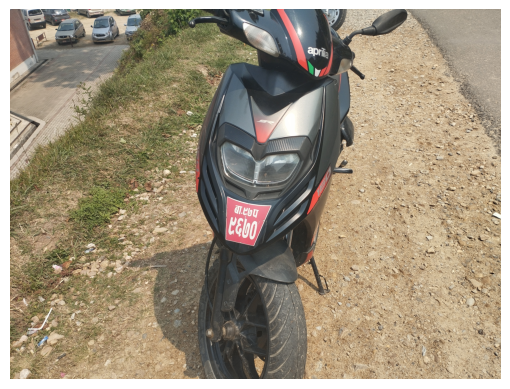

In [122]:
img = cv.imread(f"{Reg_Dir}/{reg[1]}")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis(False)

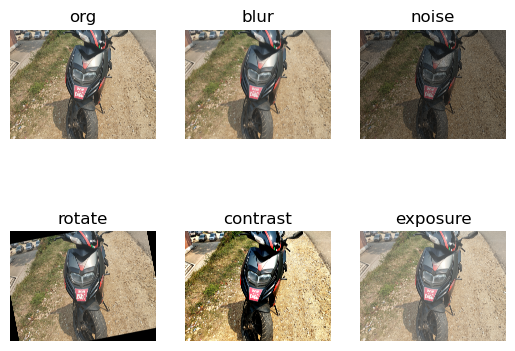

In [124]:
def blur(img:np.ndarray)->np.ndarray:
    k = random.randint(15,25)
    return cv.blur(img, ksize=(k,k))

def noise(img:np.ndarray)->np.ndarray:
    row, col, _ = img.shape
    salt = np.random.rand(row, col) < 0.3
    pepper = np.random.rand(row, col) < 0.3
    noisy_image = np.copy(img)
    noisy_image[salt] = 1
    noisy_image[pepper] = 0
    return noisy_image

def rotate(img:np.ndarray)->np.ndarray:
    angle = random.randint(5,15)
    image_center = tuple(np.array(img.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv.INTER_LINEAR)
    return result

def contrast(img:np.ndarray)->np.ndarray:
    cont = random.randint(30,100)
    f = float(131 * (cont + 127)) / (127 * (131 - cont))
    alpha_c = f
    gamma_c = 127*(1-f)
    return cv.addWeighted(img, alpha_c, img, 0, gamma_c)

def exposure(img:np.ndarray)->np.ndarray:
    brightness = random.randint(-200, 150)
    if brightness > 0:
            shadow = brightness
            highlight = 255
    else:
        shadow = 0
        highlight = 255 + brightness
    alpha_b = (highlight - shadow)/255
    gamma_b = shadow

    return cv.addWeighted(img, alpha_b, img, 0, gamma_b)

images = [
    (1,"org",img),
    (2,"blur", blur(img)),
    (3,"noise", noise(img)),
    (4,"rotate", rotate(img)),
    (5,"contrast", contrast(img)),
    (6,"exposure", exposure(img))
]

for i, label, image in images:
    plt.subplot(2,3,i)
    plt.title(label)
    plt.axis(False)
    plt.imshow(image)

plt.show()

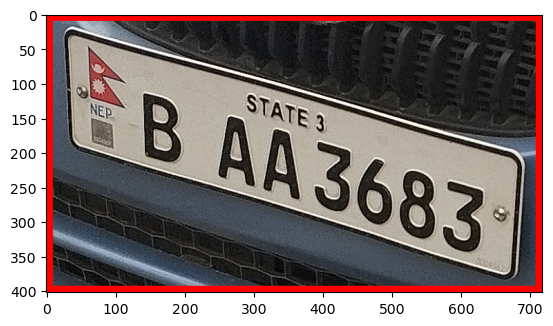

In [119]:
obj = filtred[2]

check_img = cv.imread(f"{Emb_Dir}/{obj['img_name']}")
check_img = cv.cvtColor(check_img, cv.COLOR_BGR2RGB)
a = obj['annotations'][0]
x1, y1 = int(a["x_max"]), int(a["y_max"])
x2, y2 = int(a["x_min"]), int(a["y_min"])
bb_h, bb_w = int(a["bb_h"]), int(a["bb_w"])
cv.rectangle(check_img, (x1,y1), (x2,y2), (255,0,0), 18)
crop = check_img[y1:y1+bb_h, x1:x1+bb_w]
plt.imshow(crop)